In [1]:
from PIL import Image
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Function to resize and normalize images
def normalize_and_resize_images(input_folder, output_folder, size=(256, 256)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for img_name in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_name)
        if img_path.endswith(".png"):
            img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
            img = img.resize(size)
            img_array = np.array(img) / 255.0  # Normalizing
            img_normalized = Image.fromarray((img_array * 255).astype('uint8'))
            img_normalized.save(os.path.join(output_folder, img_name))

In [3]:
#Apply transformations to increase variability of the training data
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
# Define base directories
base_input_folder = '../data/raw/archive-3/'
base_output_folder = '../data/processed/'
augmented_output_folder = '../data/processed_augmented/'

In [5]:
tumor_types = ['1', '2', '3']

# Normalize and resize images
for tumor_type in tumor_types:
    normalize_and_resize_images(os.path.join(base_input_folder, tumor_type), os.path.join(base_output_folder, tumor_type))

In [6]:
# Function to augment images
def augment_images(datagen, input_folder, output_folder, batch_size=32, save_prefix='aug', save_format='png'):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for img_name in os.listdir(input_folder):
        img_path = os.path.join(input_folder, img_name)
        if img_path.endswith(".png"):
            img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
            img_array = np.array(img).reshape((1,) + img.size + (3,))
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_folder, save_prefix=save_prefix, save_format=save_format):
                i += 1
                if i >= batch_size:
                    break

In [7]:
# Augment images
for tumor_type in tumor_types:
    augment_images(datagen, os.path.join(base_output_folder, tumor_type), os.path.join(augmented_output_folder, tumor_type + '_augmented'))

In [8]:
# Check the distribution of classes
def check_class_distribution(folder):
    class_counts = {}
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path) and not class_name.endswith('_augmented'):
            image_count = 0
            for item in os.listdir(class_path):
                item_path = os.path.join(class_path, item)
                if os.path.isfile(item_path) and item.endswith(('.png', '.jpg', '.jpeg')) and not item.startswith('.'):
                    image_count += 1
            class_counts[class_name] = image_count
    return class_counts

In [9]:
class_distribution = check_class_distribution(base_output_folder)
print(class_distribution)

{'1': 708, '3': 930, '2': 1426}


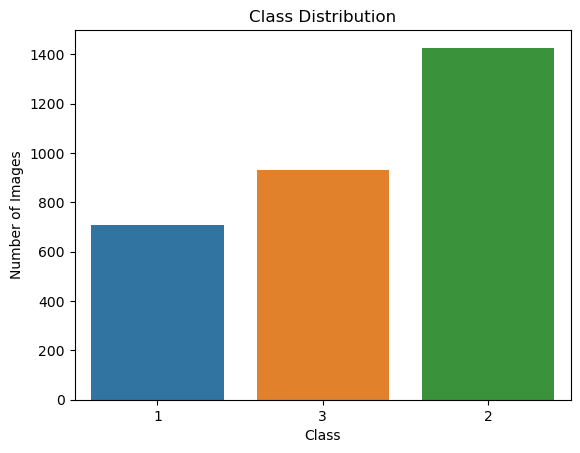

In [10]:
# Visualize class distribution
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [11]:
def show_sample_images(folder, class_name, num_samples=5):
    class_path = os.path.join(folder, class_name)
    if os.path.isdir(class_path) and not class_name.endswith('_augmented'):
        images = os.listdir(class_path)[:num_samples]
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        for img_name, ax in zip(images, axes):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            ax.imshow(img)
            ax.set_title(class_name)
            ax.axis('off')
        plt.show()
    else:
        print(f"Skipped non-directory or augmented entry: {class_path}")

Skipped non-directory or augmented entry: ../data/processed/.DS_Store


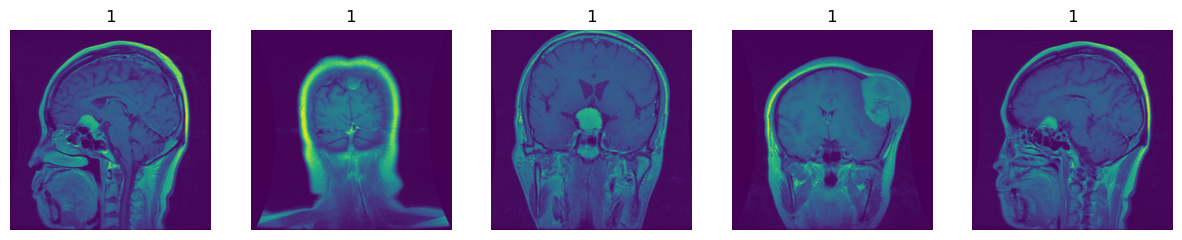

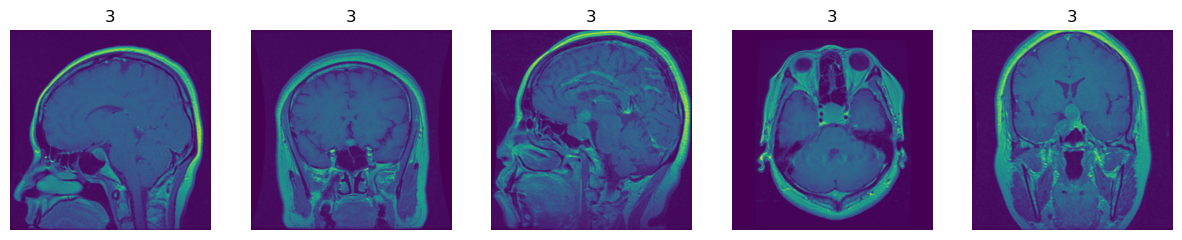

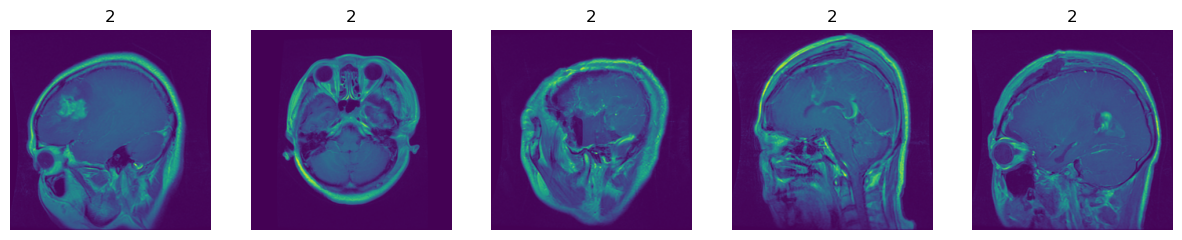

In [12]:
for class_name in os.listdir(base_output_folder):
    show_sample_images(base_output_folder, class_name)

In [13]:
def plot_pixel_intensity(folder):
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path) and not class_name.endswith('_augmented'):
            all_pixels = []
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if os.path.isfile(img_path) and img_name.endswith(('.png', '.jpg', '.jpeg')) and not img_name.startswith('.'):
                    img = Image.open(img_path).convert('L')  # Convert to grayscale
                    img_array = np.array(img).flatten()
                    all_pixels.extend(img_array)
            
            plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
            plt.title(f'Pixel Intensity Distribution for Class {class_name}')
            plt.xlabel('Pixel Intensity')
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Skipped non-directory or augmented entry: {class_path}")

Skipped non-directory or augmented entry: ../data/processed/.DS_Store


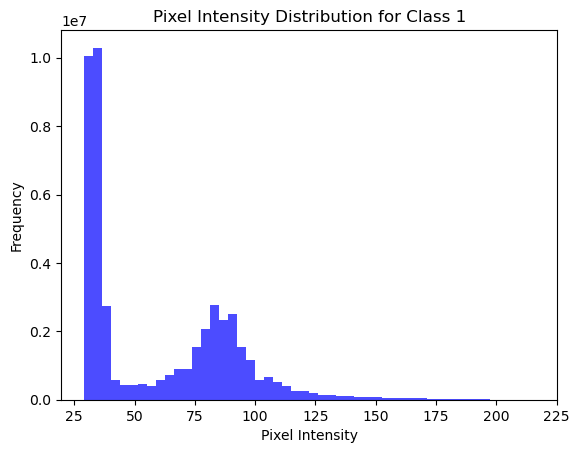

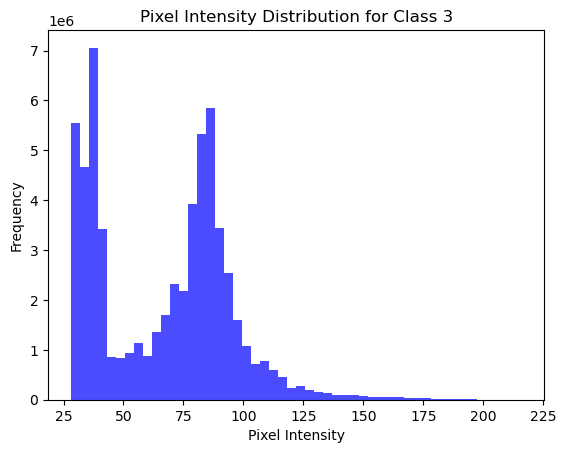

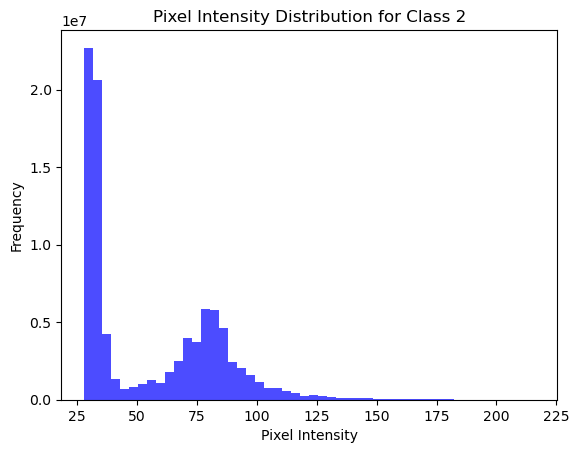

In [14]:
plot_pixel_intensity(base_output_folder)

In [7]:
def check_image_sizes(folder):
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if os.path.isdir(class_path) and not class_name.endswith('_augmented'):
            image_sizes = []
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if os.path.isfile(img_path) and img_name.endswith(('.png', '.jpg', '.jpeg')) and not img_name.startswith('.'):
                    img = Image.open(img_path)
                    image_sizes.append(img.size)
            unique_sizes = set(image_sizes)
            print(f"Unique image sizes for class {class_name}: {unique_sizes}")
        else:
            print(f"Skipped non-directory or augmented entry: {class_path}")

In [16]:
check_image_sizes(base_output_folder)

Skipped non-directory or augmented entry: Processed Data/2_augmented
Skipped non-directory or augmented entry: Processed Data/.DS_Store
Skipped non-directory or augmented entry: Processed Data/3_augmented
Unique image sizes for class 1: {(256, 256)}
Skipped non-directory or augmented entry: Processed Data/1_augmented
Unique image sizes for class 3: {(256, 256)}
Unique image sizes for class 2: {(256, 256)}
